<a href="https://colab.research.google.com/github/igor-sharipov1/dataScience/blob/main/Aprioiri_Lab_1.2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [105]:
import pandas as pd
import numpy as np
from mlxtend.frequent_patterns import apriori, association_rules
import matplotlib.pyplot as plt
import seaborn as sns
import time

# 1 dataset
#df = pd.read_csv('/content/retail_dataset.csv', sep=',') 

# 2 dataset
df = pd.read_csv('https://gist.githubusercontent.com/Harsh-Git-Hub/2979ec48043928ad9033d8469928e751/raw/72de943e040b8bd0d087624b154d41b2ba9d9b60/retail_dataset.csv', sep=',')

df = df.dropna()
df.head(10)

counts = []
waisted_time = []

all_rules = []
all_assoc_rules = []

Подгружаем используемые библиотеки, считываем файл с данными формата .csv 

In [106]:
items = set()
for col in df:
    items.update(df[col].unique())
print(items)

{'Milk', 'Eggs', 'Wine', 'Bagel', 'Meat', 'Pencil', 'Diaper', 'Cheese', 'Bread'}


Создаем множество всех встречающися в файле элементов

In [107]:
itemset = set(items)
encoded_vals = []
for index, row in df.iterrows():
    rowset = set(row) 
    labels = {}
    uncommons = list(itemset - rowset)
    commons = list(itemset.intersection(rowset))
    for uc in uncommons:
        labels[uc] = 0
    for com in commons:
        labels[com] = 1
    encoded_vals.append(labels)
encoded_vals[0]
ohe_df = pd.DataFrame(encoded_vals)

Преобразуем исходный файл с данными в DataFrame, описывающий частые наборы 

In [108]:
start_time = time.time()
freq_items = apriori(ohe_df, min_support=0.1, use_colnames=True)
end_time = time.time()
waisted_time.append(end_time - start_time)
counts.append(freq_items["itemsets"].count())
print(freq_items)

      support                                         itemsets
0    0.707317                                           (Milk)
1    0.682927                                          (Bagel)
2    0.780488                                           (Eggs)
3    0.926829                                           (Wine)
4    0.829268                                           (Meat)
..        ...                                              ...
369  0.195122        (Eggs, Wine, Meat, Pencil, Cheese, Bread)
370  0.146341        (Eggs, Wine, Meat, Diaper, Cheese, Bread)
371  0.121951      (Eggs, Wine, Pencil, Diaper, Cheese, Bread)
372  0.195122      (Wine, Meat, Pencil, Diaper, Cheese, Bread)
373  0.121951  (Milk, Eggs, Wine, Meat, Pencil, Cheese, Bread)

[374 rows x 2 columns]


Функция для выполнения алгоритма Apriori и подсчета времени, и количества частых наборов для заданного порогового значения поддержки

На графике видна зависимость количества частых наборов при выполнении алгоритма Aprioiri от порогового значения поддержки, можно сделать вывод, что при увеличении параметра min_supp количество частых наборов уменьшается

На графике видна зависимость времени выполнения алгоритма Aprioiri от порогового значения поддержки, можно сделать вывод, что при увеличении параметра min_supp время, затрачиваемое на проход по алгоритму меньше

In [109]:
def assoc_rules(threshold):
  start = time.time()
  rules = association_rules(freq_items, metric="confidence", min_threshold=threshold)
  end = time.time() - start
  print(rules)
  all_rules.append(len(rules))
  all_assoc_rules.append(end)

In [110]:
all_thresholds = [0.7, 0.75, 0.8, 0.85, 0.9, 0.95]
assoc_rules(0.7)

                                   antecedents    consequents  \
0                                       (Milk)         (Eggs)   
1                                       (Milk)         (Wine)   
2                                       (Milk)         (Meat)   
3                                       (Meat)         (Milk)   
4                                       (Milk)       (Cheese)   
..                                         ...            ...   
754    (Milk, Eggs, Wine, Meat, Pencil, Bread)       (Cheese)   
755    (Milk, Eggs, Wine, Meat, Cheese, Bread)       (Pencil)   
756  (Milk, Eggs, Wine, Pencil, Cheese, Bread)         (Meat)   
757  (Milk, Eggs, Meat, Pencil, Cheese, Bread)         (Wine)   
758         (Milk, Eggs, Meat, Pencil, Cheese)  (Wine, Bread)   

     antecedent support  consequent support   support  confidence      lift  \
0              0.707317            0.780488  0.536585    0.758621  0.971983   
1              0.707317            0.926829  0.634146    0.89

In [111]:
assoc_rules(0.75)

                                   antecedents     consequents  \
0                                       (Milk)          (Eggs)   
1                                       (Milk)          (Wine)   
2                                       (Milk)          (Meat)   
3                                       (Milk)        (Cheese)   
4                                       (Milk)         (Bread)   
..                                         ...             ...   
484      (Meat, Pencil, Diaper, Cheese, Bread)          (Wine)   
485              (Meat, Pencil, Diaper, Bread)  (Wine, Cheese)   
486            (Pencil, Diaper, Cheese, Bread)    (Meat, Wine)   
487   (Milk, Eggs, Wine, Meat, Pencil, Cheese)         (Bread)   
488  (Milk, Eggs, Meat, Pencil, Cheese, Bread)          (Wine)   

     antecedent support  consequent support   support  confidence      lift  \
0              0.707317            0.780488  0.536585    0.758621  0.971983   
1              0.707317            0.926829  0.63

In [112]:
assoc_rules(0.8)

                                   antecedents     consequents  \
0                                       (Milk)          (Wine)   
1                                       (Milk)          (Meat)   
2                                       (Milk)         (Bread)   
3                                      (Bagel)          (Wine)   
4                                       (Eggs)          (Wine)   
..                                         ...             ...   
294      (Meat, Pencil, Diaper, Cheese, Bread)          (Wine)   
295              (Meat, Pencil, Diaper, Bread)  (Wine, Cheese)   
296            (Pencil, Diaper, Cheese, Bread)    (Meat, Wine)   
297   (Milk, Eggs, Wine, Meat, Pencil, Cheese)         (Bread)   
298  (Milk, Eggs, Meat, Pencil, Cheese, Bread)          (Wine)   

     antecedent support  consequent support   support  confidence      lift  \
0              0.707317            0.926829  0.634146    0.896552  0.967332   
1              0.707317            0.829268  0.58

In [113]:
assoc_rules(0.85)

                               antecedents consequents  antecedent support  \
0                                   (Milk)      (Wine)            0.707317   
1                                   (Milk)     (Bread)            0.707317   
2                                  (Bagel)      (Wine)            0.682927   
3                                   (Eggs)      (Wine)            0.780488   
4                                   (Meat)      (Wine)            0.829268   
..                                     ...         ...                 ...   
169    (Eggs, Meat, Pencil, Cheese, Bread)      (Wine)            0.219512   
170    (Eggs, Meat, Diaper, Cheese, Bread)      (Wine)            0.146341   
171  (Eggs, Pencil, Diaper, Cheese, Bread)      (Wine)            0.121951   
172    (Wine, Meat, Pencil, Diaper, Bread)    (Cheese)            0.195122   
173  (Meat, Pencil, Diaper, Cheese, Bread)      (Wine)            0.195122   

     consequent support   support  confidence      lift  levera

In [114]:
assoc_rules(0.9)

                              antecedents consequents  antecedent support  \
0                                  (Eggs)      (Wine)            0.780488   
1                                  (Meat)      (Wine)            0.829268   
2                                (Pencil)      (Wine)            0.731707   
3                                (Diaper)      (Wine)            0.682927   
4                                (Cheese)      (Wine)            0.829268   
..                                    ...         ...                 ...   
93   (Eggs, Meat, Pencil, Diaper, Cheese)      (Wine)            0.170732   
94    (Eggs, Meat, Diaper, Cheese, Bread)      (Wine)            0.146341   
95  (Eggs, Pencil, Diaper, Cheese, Bread)      (Wine)            0.121951   
96    (Wine, Meat, Pencil, Diaper, Bread)    (Cheese)            0.195122   
97  (Meat, Pencil, Diaper, Cheese, Bread)      (Wine)            0.195122   

    consequent support   support  confidence      lift  leverage  convictio

In [115]:
assoc_rules(0.95)

                              antecedents consequents  antecedent support  \
0                                (Cheese)      (Wine)            0.829268   
1                          (Milk, Cheese)      (Wine)            0.536585   
2                         (Bagel, Cheese)      (Wine)            0.512195   
3                          (Eggs, Cheese)      (Wine)            0.609756   
4                          (Meat, Cheese)      (Wine)            0.682927   
5                        (Pencil, Cheese)      (Wine)            0.609756   
6                        (Diaper, Cheese)      (Wine)            0.560976   
7                         (Cheese, Bread)      (Wine)            0.658537   
8                  (Milk, Diaper, Cheese)      (Wine)            0.268293   
9                  (Milk, Pencil, Diaper)     (Bread)            0.146341   
10                (Bagel, Diaper, Cheese)      (Wine)            0.365854   
11                 (Diaper, Eggs, Cheese)      (Wine)            0.390244   

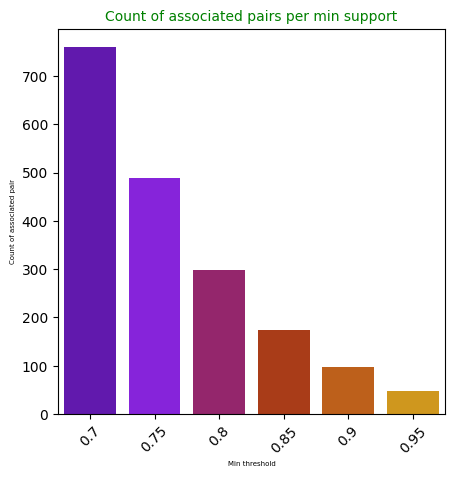

Counts: [374]


In [116]:

plt.figure(figsize=(5,5))
sns.barplot(x = all_thresholds, y = all_rules, palette = 'gnuplot')
plt.xlabel('Min threshold', size = 5)
plt.xticks(rotation=45)
plt.ylabel('Count of associated pair', size = 5)
plt.title('Count of associated pairs per min support', color = 'green', size = 10)
plt.show()
print("Counts:",counts)

На графике мы видим зависимость количества ассоциативных правил от порогового значения достоверности

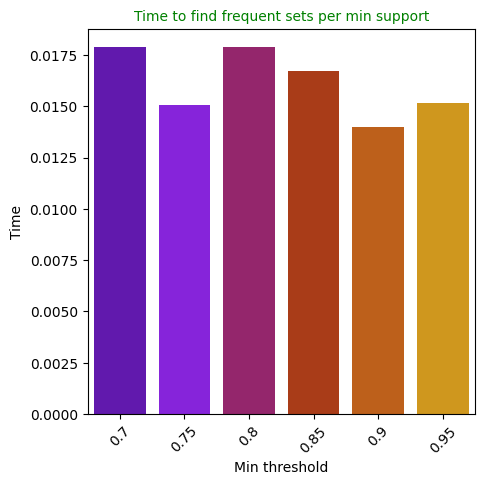

Time: [0.03157305717468262]


In [117]:
plt.figure(figsize=(5,5))
sns.barplot(x = all_thresholds, y = all_assoc_rules, palette = 'gnuplot')
plt.xlabel('Min threshold', size = 10)
plt.xticks(rotation=45)
plt.ylabel('Time', size = 10)
plt.title('Time to find frequent sets per min support', color = 'green', size = 10)
plt.show()
print("Time:",waisted_time)

На графике мы видим зависимость времени выполнения поиска ассоциативных правил от порогового значения достоверности